#  LIBRARY

In [52]:
# # install package để forecast
install.packages("forecast")
library("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



# 1. LOAD DATA

In [3]:
# https://drive.google.com/file/d/1zFZoCCSJwdsVp3GKNcwzjFiOJ1hyucYo/view?usp=drive_link
system('gdown --id 1zFZoCCSJwdsVp3GKNcwzjFiOJ1hyucYo')

In [4]:
data = read.csv('Export_rice_prices_5percent_broken_vn.csv')

# 2. DATA OVERVIEW

In [6]:
head(data)

,date,price
,<chr>,<dbl>
1,1/1/2004,198.82
2,2/1/2004,204.07
3,3/1/2004,225.80
4,4/1/2004,240.71
5,5/1/2004,236.14
6,6/1/2004,230.74


In [11]:
tail(data)

,date,price
,<chr>,<dbl>
220,4/1/2022,402.38
221,5/1/2022,406.45
222,6/1/2022,411.92
223,7/1/2022,411.09
224,8/1/2022,395.80
225,9/1/2022,391.78


In [10]:
dim(data)

[1] 225   2

In [7]:
str(data)

'data.frame':	225 obs. of  2 variables:
 $ date : chr  "1/1/2004" "2/1/2004" "3/1/2004" "4/1/2004" ...
 $ price: num  199 204 226 241 236 ...


In [8]:
summary(data)

     date               price      
 Length:225         Min.   :198.8  
 Class :character   1st Qu.:341.0  
 Mode  :character   Median :386.9  
                    Mean   :386.3  
                    3rd Qu.:431.1  
                    Max.   :780.0  

In [9]:
# check xem có NA data không
sprintf("Total NA of data = %d", sum(is.na(data)))

[1] "Total NA of data = 0"

# 3. Tranform to Times Series object

In [37]:
ts.data = ts(data$price, frequency = 12, start = c(2004,1))

In [38]:
print(ts.data)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2004 198.8200 204.0700 225.8000 240.7100 236.1400 230.7400 228.9600 232.7200
2005 255.3200 265.6400 262.9200 259.9200 256.1400 241.4900 237.2800 255.6500
2006 263.8600 264.2900 244.8600 244.2500 256.2300 259.4300 257.4300 263.6300
2007 298.0525 303.0000 304.9300 302.2500 300.3600 302.4900 302.7100 310.0000
2008 451.4286 517.1429 582.8571 648.5714 714.2857 780.0000 698.0000 607.5000
2009 386.7900 418.0900 424.0450 430.0000 405.1800 404.2800 410.2300 395.7200
2010 485.2800 421.7800 392.5700 371.1700 368.8200 358.2200 357.8600 422.8600
2011 493.8600 478.5700 464.0000 484.2900 479.6400 475.2800 519.4600 553.4300
2012 451.4300 430.4300 428.7500 440.7200 433.2900 411.9600 409.2800 436.4300
2013 401.2400 401.6400 401.6100 390.7600 386.8500 385.9300 387.7400 399.4400
2014 402.0000 393.1600 378.5700 370.9100 390.4800 404.5000 420.8700 442.6200
2015 374.4200 353.5000 360.7400 354.0200 351.0000 349.0000 345.7800 340.1300

# 4. Plot times series object

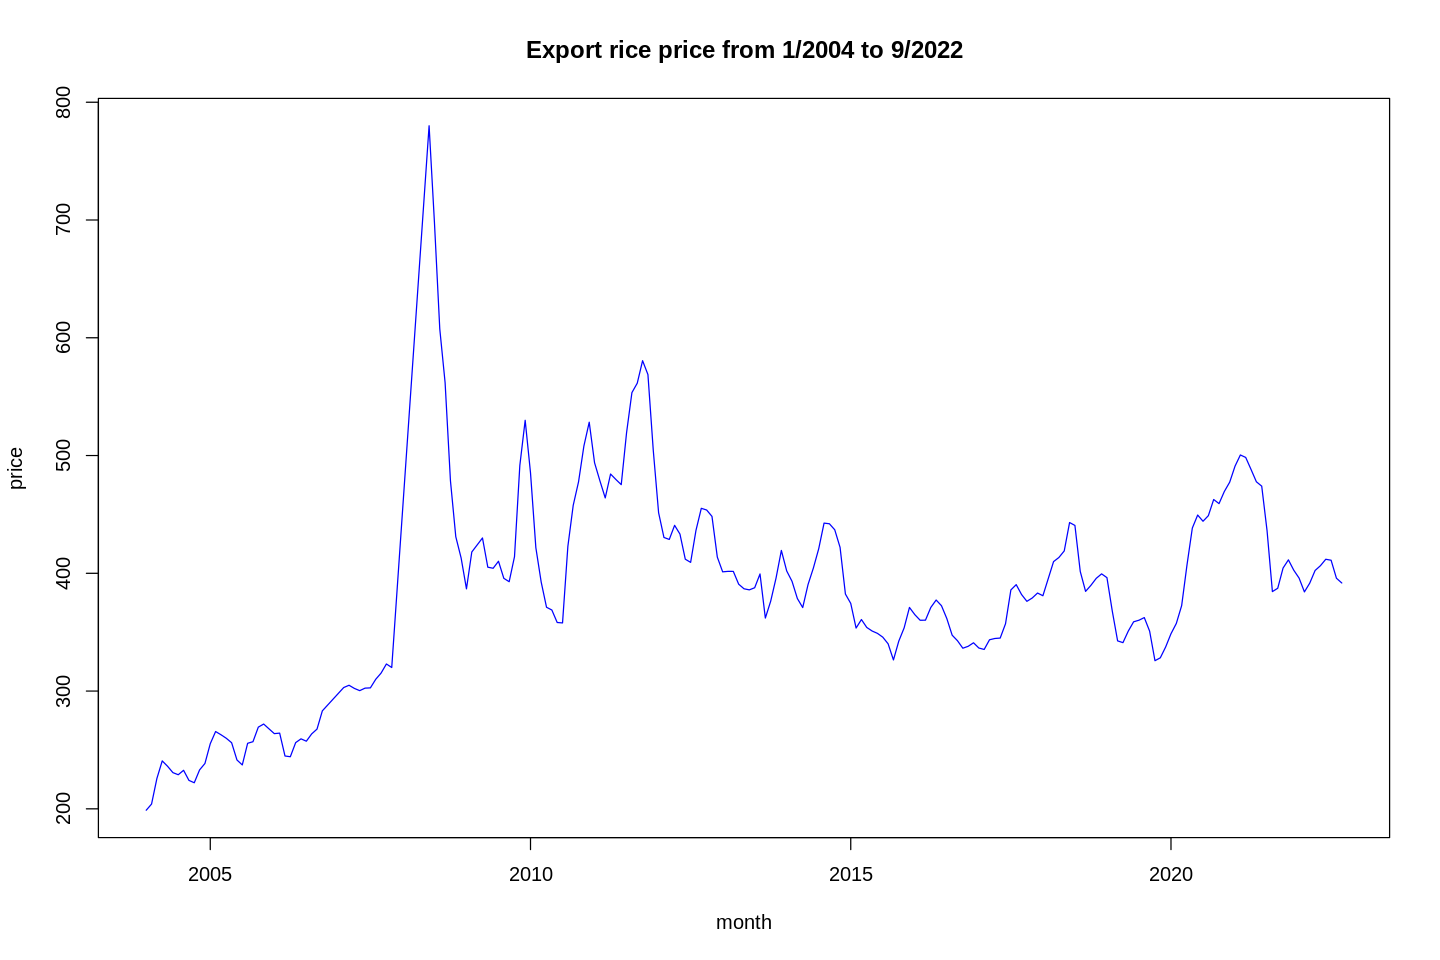

In [39]:
# Trực quan
options(repr.plot.width = 12, repr.plot.height = 8)
plot.ts(ts.data, main = "Export rice price from 1/2004 to 9/2022", ylab = "price", xlab = "month", col="blue")

# 5. Decompostition

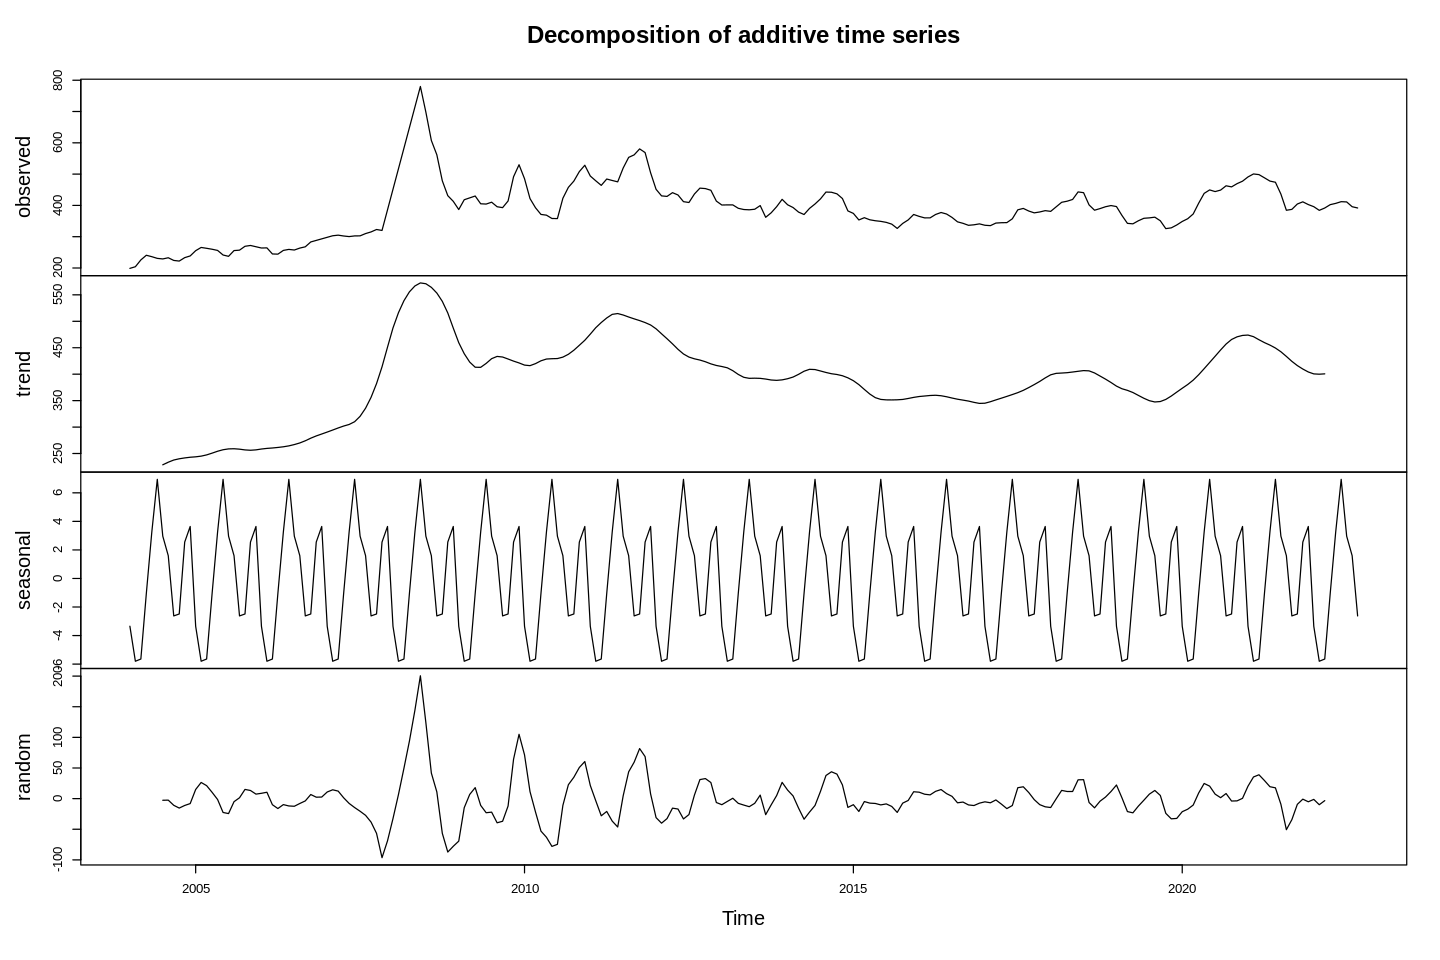

In [40]:
comp = decompose(ts.data)
plot(comp)

Nhận xét:
* Trend: Giá gạo xuất khẩu có xu hướng tăng nhanh từ 2004 - 2008, sau đó giảm nhanh vào 2009, khoảng thời gian sau đó lượng giá gạo bình ổn hơn nhưng cũng có những thời điểm giao động tăng giảm nhất định
* Seasonal (theo mùa): Giá gạo xuất khẩu có tính seasonal

# 6. Prediction Model & Visualize

In [ ]:
## Do dữ liệu có seasonal & trend --> Dùng HWES

In [44]:
HWES.forecast_log = HoltWinters(log(ts.data))

In [45]:
HWES.forecast_log

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = log(ts.data))

Smoothing parameters:
 alpha: 0.8969336
 beta : 0.005227704
 gamma: 1

Coefficients:
            [,1]
a    6.002882793
b    0.004094236
s1  -0.042713572
s2  -0.040162560
s3  -0.040899409
s4  -0.036492910
s5  -0.018190918
s6   0.017568247
s7   0.043579927
s8   0.047087178
s9   0.027527916
s10 -0.007854472
s11 -0.030011670
s12 -0.032182336

Nhận xét:
alpha ~ 0.8 khá cao: giá trị hiện tại phụ thuộc vào các giá trị gần đây --> mô hình sẽ tập trung nhiều vào các quan sát gần đây hơn.

beta = 0.004: rất thấp: Tham số beta ảnh hưởng đến tốc độ điều chỉnh của mô hình đối với xu hướng --> do beta thấp nên model đáp ứng chậm hơn xu hướng.

gamma= 1: rất cao: ảnh hưởng của yếu tố seasonal --> mô hình đáp ứng mạnh mẽ với yếu tố mùa

s_x: là sai số của từng tháng

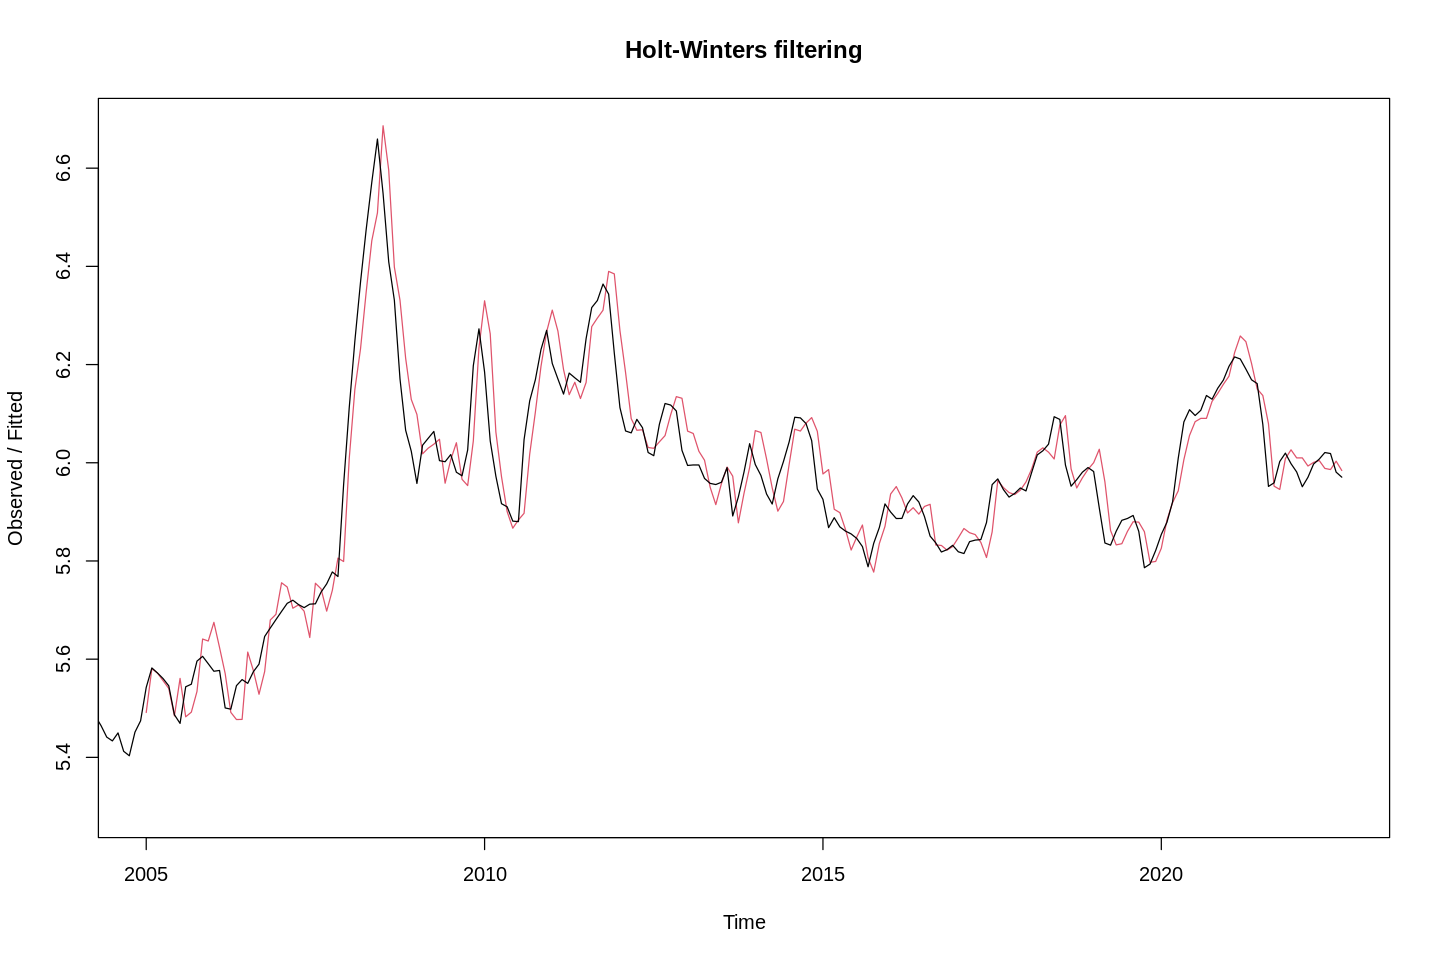

In [46]:
# Vẽ biểu đồ thể hiện giá trị thực tế & giá trị dự đoán

plot(HWES.forecast_log)

In [48]:
# Kiểm tra SSE (sum phương sai)

HWES.forecast_log$SSE

[1] 0.8751965

Nhận xét: Phương sai SSE khá thấp so với khoảng dữ liệu giá gạo đã log là [5.4 - 6.6] --> Model khá phù hợp với dữ liệu



In [49]:
# rmse
(HWES.forecast_log$SSE/length(ts.data))^0.5

[1] 0.06236796

Nhận xét: RMSE cũng khá thấp cho thấy sai số không đáng kể --> Model khá chính xác

# 7. Predict Rice Price in the next 12 months

In [57]:
# Dùng model để forecast lượng mưa trong 12 tháng kế tiếp
HWES.forecast_log.new = forecast:::forecast.HoltWinters(HWES.forecast_log, h=12)
HWES.forecast_log.new

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2022       5.964263 5.882186 6.046341 5.838737 6.089790
Nov 2022       5.970909 5.860396 6.081421 5.801894 6.139923
Dec 2022       5.974266 5.841050 6.107482 5.770529 6.178003
Jan 2023       5.982767 5.830001 6.135533 5.749131 6.216402
Feb 2023       6.005163 5.834910 6.175416 5.744784 6.265543
Mar 2023       6.045016 5.858757 6.231276 5.760157 6.329876
Apr 2023       6.075122 5.873982 6.276263 5.767504 6.382741
May 2023       6.082724 5.867594 6.297854 5.753710 6.411737
Jun 2023       6.067259 5.838866 6.295652 5.717962 6.416556
Jul 2023       6.035971 5.794921 6.277020 5.667317 6.404624
Aug 2023       6.017908 5.764716 6.271099 5.630684 6.405131
Sep 2023       6.019831 5.754941 6.284722 5.614717 6.424946

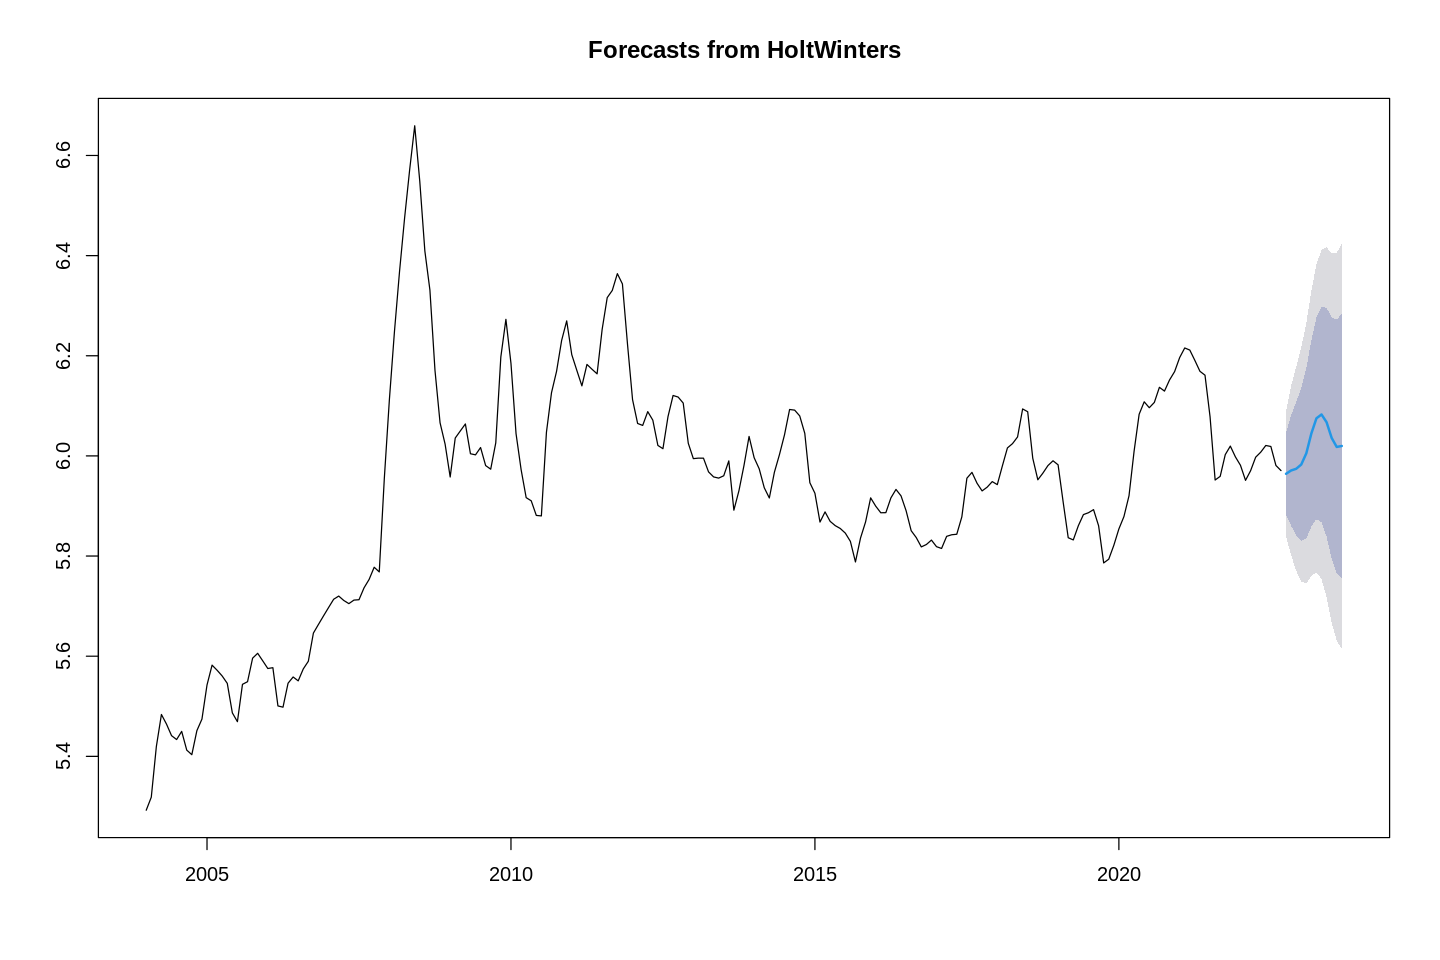

In [58]:
# Vẽ 12 tháng forecast ở trên

plot(HWES.forecast_log.new)

In [78]:
# Do dữ liệu đã log rồi --> sau khi forecast cần trả về dl bình thường

y = data.frame(HWES.forecast_log.new)
y$Forecast = exp(y$Point.Forecast)

In [79]:
y

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95,Forecast
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Oct 2022,5.964263,5.882186,6.046341,5.838737,6.089790,389.2662
Nov 2022,5.970909,5.860396,6.081421,5.801894,6.139923,391.8616
Dec 2022,5.974266,5.841050,6.107482,5.770529,6.178003,393.1794
Jan 2023,5.982767,5.830001,6.135533,5.749131,6.216402,396.5360
Feb 2023,6.005163,5.834910,6.175416,5.744784,6.265543,405.5171
Mar 2023,6.045016,5.858757,6.231276,5.760157,6.329876,422.0047
Apr 2023,6.075122,5.873982,6.276263,5.767504,6.382741,434.9027
May 2023,6.082724,5.867594,6.297854,5.753710,6.411737,438.2212
Jun 2023,6.067259,5.838866,6.295652,5.717962,6.416556,431.4963


Nhận xét:
Dữ liệu forecast cũng khá sát với dữ liệu giá gạo tại thời điểm 09/2022: 391.78.
Với độ tin cậy là 95% thì giá gạo T10/2022 khi đã logarith sẽ giao động từ 5.8 ~ 6.0 (tương đương 330.3 ~ 404)
Dữ liệu predict cũng cho thấy giá gạo bị ảnh hưởng khá nhiều bởi biến động giá liền kề trước đó.